In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [201]:
data=pd.read_csv('Mental_health_data.csv')

In [202]:
data.head()

,Emp_ID,Age,Gender,family_history,treatment,work_interfere,remote_work,benefits,wellness_program,seek_help,anonymity,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,leave
0,1000,37.0,Female,No,Yes,Often,No,Yes,No,Yes,Yes,No,No,Some of them,Yes,No,Maybe,Yes,Somewhat easy
1,1001,44.0,Male,No,No,Rarely,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,Don't know
2,1002,32.0,Male,No,No,Rarely,No,No,No,No,Don't know,No,No,Yes,Yes,Yes,Yes,No,Somewhat difficult
3,1003,31.0,Male,Yes,Yes,Often,No,No,No,No,No,Yes,Yes,Some of them,No,Maybe,Maybe,No,Somewhat difficult
4,1004,31.0,Male,No,No,Never,Yes,Yes,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,Don't know


In [139]:
def mapping(data):
    
    Gender = {}
    Gender['Male'] = 0 
    Gender['Female'] = 1 
    Gender['Others'] = 2 

    data.Gender = data.Gender.map(Gender)
        
    family_history = {}
    family_history['Yes'] = 1
    family_history['No'] = 0
    family_history["Don't know"] = 2
    
    data.family_history = data.family_history.map(family_history)
    data.treatment = data.treatment.map(family_history)
    data.remote_work = data.remote_work.map(family_history)
    data.benefits = data.benefits.map(family_history)
    data.wellness_program = data.wellness_program.map(family_history)
    data.seek_help = data.seek_help.map(family_history)
    data.anonymity = data.anonymity.map(family_history)
    data.mental_vs_physical = data.mental_vs_physical.map(family_history)

    work_interfere = {}
    work_interfere['Sometimes'] = 0
    work_interfere['Never'] = 1
    work_interfere['Rarely'] = 2 
    work_interfere['Often'] = 3

    data.work_interfere = data.work_interfere.map(work_interfere)
    
    mental_health_consequence = {}
    mental_health_consequence['Yes'] = 1 
    mental_health_consequence['No'] = 0 
    mental_health_consequence['Maybe'] = 2 

    data.mental_health_consequence = data.mental_health_consequence.map(mental_health_consequence)
    data.phys_health_consequence = data.phys_health_consequence.map(mental_health_consequence)
    data.mental_health_interview = data.mental_health_interview.map(mental_health_consequence)
    data.phys_health_interview = data.phys_health_interview.map(mental_health_consequence)

    
    coworkers = {}
    coworkers['Yes'] = 1 
    coworkers['No'] = 0 
    coworkers['Some of them'] = 2 

    data.coworkers = data.coworkers.map(coworkers)
    data.supervisor = data.supervisor.map(coworkers)
            
    return data

data = mapping(data)

In [140]:
leave={}
leave['Very difficult']=10
leave['Somewhat difficult']=30
leave["Don't know"]=50
leave['Somewhat easy']=70
leave['Very easy']=90

data['leave'] = data['leave'].map(leave)

In [141]:
data.head()

,Emp_ID,Age,Gender,family_history,treatment,work_interfere,remote_work,benefits,wellness_program,seek_help,anonymity,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,leave
0,1000,37.0,1,0,1,3.0,0,1,0,1,1,0,0,2,1,0,2,1,70
1,1001,44.0,0,0,0,2.0,0,2,2,2,2,2,0,0,0,0,0,2,50
2,1002,32.0,0,0,0,2.0,0,0,0,0,2,0,0,1,1,1,1,0,30
3,1003,31.0,0,1,1,3.0,0,0,0,0,0,1,1,2,0,2,2,0,30
4,1004,31.0,0,0,0,1.0,1,1,2,2,2,0,0,2,1,1,1,2,50


# work interfernce

In [51]:
male=data[data['Gender']==0]
female=data[data['Gender']==1]
others=data[data['Gender']==2]

#     work_interfere['Sometimes'] = 0
#     work_interfere['Never'] = 1
#     work_interfere['Rarely'] = 2 
#     work_interfere['Often'] = 3

print(male['work_interfere'].value_counts())
for i in male['work_interfere'].value_counts():
    print(i/male.shape[0]*100)
print('---------------------------------------------------------')
print(female['work_interfere'].value_counts())
for i in female['work_interfere'].value_counts():
    print(i/female.shape[0]*100)
print('---------------------------------------------------------')
print(others['work_interfere'].value_counts())
for i in others['work_interfere'].value_counts():
    print(i/others.shape[0]*100)

0.0    350
1.0    187
2.0    126
3.0    105
Name: work_interfere, dtype: int64
35.140562248995984
18.775100401606426
12.650602409638553
10.542168674698797
---------------------------------------------------------
0.0    108
2.0     45
3.0     34
1.0     25
Name: work_interfere, dtype: int64
43.54838709677419
18.14516129032258
13.709677419354838
10.080645161290322
---------------------------------------------------------
0.0    7
3.0    5
2.0    2
1.0    1
Name: work_interfere, dtype: int64
46.666666666666664
33.33333333333333
13.333333333333334
6.666666666666667


Graphs to show which gender is more often gets Distracted or gets interefered because of their mental illness or health condition and in accordance wit the data we can be sure that people who have Gender categorised as 'Others' oftens gets distracted or interfered 

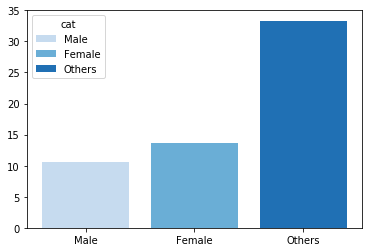

In [153]:
y=[10.54,13.70,33.33]
x=['Male','Female','Others']
sns.set_context(rc={"figure.figsize": (8, 4)})
fig = plt.bar(x, y, color=sns.color_palette("Blues",3))
plt.legend(fig, ['Male','Female','Others'], loc = "upper left", title = "cat")
plt.show()

# Anonimity

Graphs to show which gender is more insecure or concerned about their anonimity while sharing their infomormation to a third person and according to the insight we are sure that the Males are more insecure about their anonimity


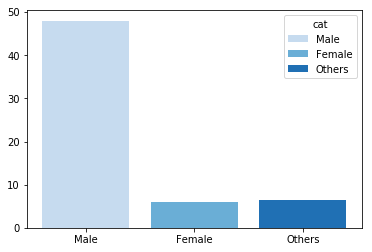

In [152]:
y=[48,6,6.5]
x=['Male','Female','Others']
sns.set_context(rc={"figure.figsize": (8, 4)})
fig = plt.bar(x, y, color=sns.color_palette("Blues",3))
plt.legend(fig, ['Male','Female','Others'], loc = "upper right", title = "cat")
plt.show()

In [52]:
#     family_history['Yes'] = 1
#     family_history['No'] = 0
#     family_history["Don't know"] = 2

print(male['anonymity'].value_counts())
for i in male['anonymity'].value_counts():
    print(i/male.shape[0]*100)
print('---------------------------------------------------------')
print(female['anonymity'].value_counts())
for i in female['anonymity'].value_counts():
    print(i/female.shape[0]*100)
print('---------------------------------------------------------')
print(others['anonymity'].value_counts())
for i in others['anonymity'].value_counts():
    print(i/others.shape[0]*100)

2    658
1    290
0     48
Name: anonymity, dtype: int64
66.06425702811245
29.116465863453815
4.819277108433735
---------------------------------------------------------
2    154
1     78
0     16
Name: anonymity, dtype: int64
62.096774193548384
31.451612903225808
6.451612903225806
---------------------------------------------------------
2    7
1    7
0    1
Name: anonymity, dtype: int64
46.666666666666664
46.666666666666664
6.666666666666667


# consequence

In [166]:
male=data[data['Gender']==0]
female=data[data['Gender']==1]
others=data[data['Gender']==2]

#     mental_health_consequence = {}
#     mental_health_consequence['Yes'] = 1 
#     mental_health_consequence['No'] = 0 
#     mental_health_consequence['Maybe'] = 2 

# How shy and afraid are genders to share their Mental Health to the co=ordinators
male[(male['mental_health_consequence']==0)& (male['phys_health_consequence']==0)].shape[0]/male.shape[0]*100

40.963855421686745

In [167]:
female[(female['mental_health_consequence']==0)& (female['phys_health_consequence']==0)].shape[0]/female.shape[0]*100

29.03225806451613

In [168]:
others[(others['mental_health_consequence']==0)& (others['phys_health_consequence']==0)].shape[0]/others.shape[0]*100

13.333333333333334

This Graphs shows that Gender with 'Others' are actually more afarid of the negative consequesnce after sharing their information about their Mental and physical health to other people.

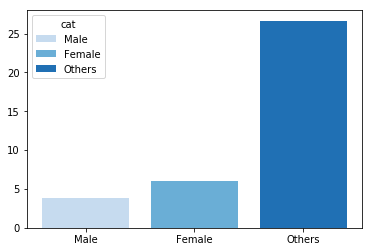

In [165]:
y=[3.81,6.04,26.66]
x=['Male','Female','Others']
sns.set_context(rc={"figure.figsize": (8, 4)})
fig = plt.bar(x, y, color=sns.color_palette("Blues",3))
plt.legend(fig, ['Male','Female','Others'], loc = "upper left", title = "cat")
plt.show()

Where as Males doesn't have an negative view towards the consequesnce after sharing their information about their Mental and physical health to other people

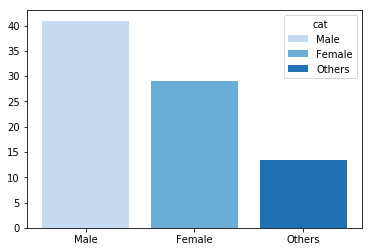

In [169]:
y=[40.96,29.03,13.33]
x=['Male','Female','Others']
sns.set_context(rc={"figure.figsize": (8, 4)})
fig = plt.bar(x, y, color=sns.color_palette("Blues",3))
plt.legend(fig, ['Male','Female','Others'], loc = "upper right", title = "cat")
plt.show()

# willingness to discuss

In [176]:
#     coworkers['Yes'] = 1 
#     coworkers['No'] = 0 
#     coworkers['Some of them'] = 2 

male[(male['coworkers']==0)& (male['supervisor']==0)].shape[0]/male.shape[0]*100

15.66265060240964

In [177]:
female[(female['coworkers']==0)& (female['supervisor']==0)].shape[0]/female.shape[0]*100

16.129032258064516

In [178]:
others[(others['coworkers']==0)& (others['supervisor']==0)].shape[0]/others.shape[0]*100

20.0

This Graphs or an insight shows that Gender with 'Others' are actually least willing to share any information to their Coworkers and Supervisor.

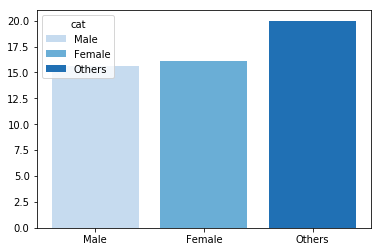

In [181]:
y=[15.66,16.12,20]
x=['Male','Female','Others']
sns.set_context(rc={"figure.figsize": (8, 4)})
fig = plt.bar(x, y, color=sns.color_palette("Blues",3))
plt.legend(fig, ['Male','Female','Others'], loc = "upper left", title = "cat")
plt.show()

# remote_work

In [191]:
#     family_history = {}
#     family_history['Yes'] = 1
#     family_history['No'] = 0
#     family_history["Don't know"] = 2

remote=data[data['remote_work']==1]
non_remote=data[data['remote_work']==0]

In [193]:
#     work_interfere['Sometimes'] = 0
#     work_interfere['Never'] = 1
#     work_interfere['Rarely'] = 2 
#     work_interfere['Often'] = 3

print('---------------------------------------------------------')
print(remote['work_interfere'].value_counts())
for i in remote['work_interfere'].value_counts():
    print(i/remote.shape[0]*100)
print('---------------------------------------------------------')
print(non_remote['work_interfere'].value_counts())
for i in non_remote['work_interfere'].value_counts():
    print(i/non_remote.shape[0]*100)

---------------------------------------------------------
0.0    143
1.0     56
2.0     54
3.0     51
Name: work_interfere, dtype: int64
38.03191489361702
14.893617021276595
14.361702127659576
13.563829787234042
---------------------------------------------------------
0.0    322
1.0    157
2.0    119
3.0     93
Name: work_interfere, dtype: int64
36.46659116647792
17.780294450736125
13.476783691959229
10.532276330690827


Employess who are not remotely working are less pron to get distracted or interfered in there work.

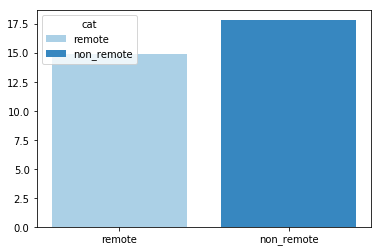

In [197]:
y=[14.89,17.78]
x=['remote','non_remote']
sns.set_context(rc={"figure.figsize": (8, 4)})
fig = plt.bar(x, y, color=sns.color_palette("Blues",2))
plt.legend(fig, ['remote','non_remote'], loc = "upper left", title = "cat")
plt.show()

In [198]:
# else
data.head()

,Emp_ID,Age,Gender,family_history,treatment,work_interfere,remote_work,benefits,wellness_program,seek_help,anonymity,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,leave
0,1000,37.0,1,0,1,3.0,0,1,0,1,1,0,0,2,1,0,2,1,70
1,1001,44.0,0,0,0,2.0,0,2,2,2,2,2,0,0,0,0,0,2,50
2,1002,32.0,0,0,0,2.0,0,0,0,0,2,0,0,1,1,1,1,0,30
3,1003,31.0,0,1,1,3.0,0,0,0,0,0,1,1,2,0,2,2,0,30
4,1004,31.0,0,0,0,1.0,1,1,2,2,2,0,0,2,1,1,1,2,50
